In [76]:
import statistics as st
import numpy as my_np
from collections import Counter

data = [1, 2, 2, 3, 4, 4, 4, 5]

print('Mean: ', st.mean(data))
print('Median:', st.median(data))
print('Mode: ', st.mode(data))

def my_mean(data):
    return sum(data)/len(data)

def my_median(data):
    return data[(len(x)//2)-1]

def my_mode_one(data):
    data_set = set(data)
    max_dict = dict()
    for i in data_set:
        max_dict[i] = 0
    for i in data_set:
        for j in data:
            if i == j:
                max_dict[i] += 1
    mode_list = []
    maxV = max(max_dict.values())
    for k, val in max_dict.items():
        if val ==maxV:
            mode_list.append(k)
    return mode_list

def my_mode_two(data):
    """return a list, might be more than one mode"""
    counts = Counter(data)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

print(st.mode(data), my_mode_one(data), my_mode_two(data))

Mean:  3.125
Median: 3.5
Mode:  4
4 [4] [4]


In [77]:
print(my_mode_two(data))

[4]


In [78]:
my_dict = {'a':10, 'b':20, 'c':15}
print('value for key "a" is: ', my_dict['a'])

#adding a new key-value pari to the dictionary
my_dict['d'] = 25
print('Updated dictionaryd:', my_dict)
#Updating a value in a dictionary
my_dict['a'] = 33
print('Dictionary after value updated is: ', my_dict)

value for key "a" is:  10
Updated dictionaryd: {'a': 10, 'b': 20, 'c': 15, 'd': 25}
Dictionary after value updated is:  {'a': 33, 'b': 20, 'c': 15, 'd': 25}


In [79]:
ds = [1, 2, 2, 3, 4, 4, 4, 5, 6]
def my_var(data):
    dm = my_mean(data)
    length = len(data)
    return sum([(x_i - dm)**2 for x_i in data])/(length-1)

def my_std(data):
    return my_np.sqrt(my_var(data))

print(st.variance(ds), my_var(data), my_np.var(ds))
print(st.stdev(ds), my_std(ds))


2.5277777777777777 1.8392857142857142 2.2469135802469133
1.5898986690282428 1.5898986690282426


In [80]:
def my_quantile(x, p): #p is the float point number that is less than 1.0, x is the list
    x_idx = int(p*len(x))
    return sorted(x)[x_idx]

print(my_quantile(ds, 0.3), my_quantile(ds, 0.75), my_np.quantile(ds, 0.75))


2 4 4.0


In [81]:
#adding co-variance
def my_cov(X, Y):
    xv = my_np.array([(x-my_mean(X)) for x in X])
    yv = my_np.array([(y-my_mean(Y)) for y in Y])
    return my_np.dot(xv, yv)/(len(X)-1)

X =[i for i in range(0, 10)] #, 1)]
Y =[j for j in range(11, 21)] #, 1)]

print(len(X), print(len(Y)))

print('my cov: \n', my_cov(X, Y), '\n')
print('np cov: \n', my_np.cov(X, Y))

r = my_cov(X, Y)/(my_std(X)*my_std(Y))
print('The correlation is {:.3f}'.format(r))



10
10 None
my cov: 
 9.166666666666666 

np cov: 
 [[9.16666667 9.16666667]
 [9.16666667 9.16666667]]
The correlation is 1.000


Correlation matrix:
 [[1.         0.99441683]
 [0.99441683 1.        ]]


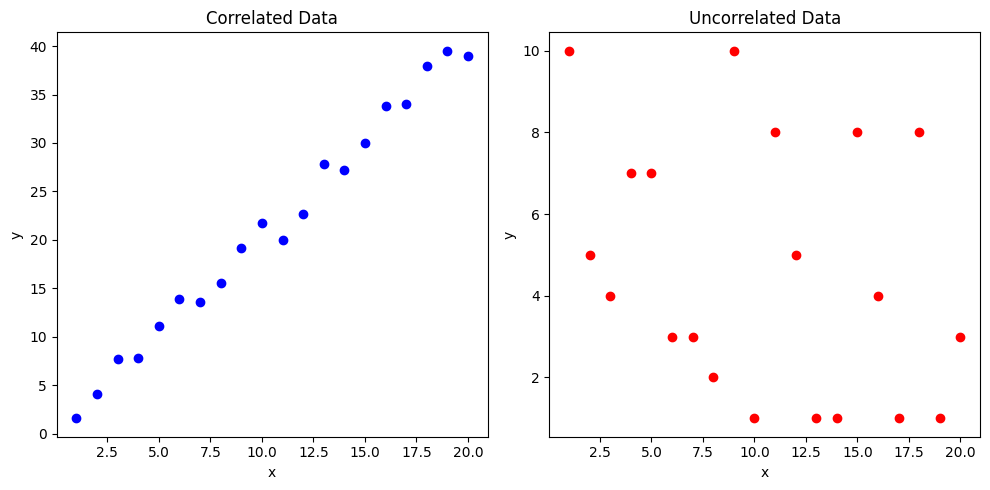

In [82]:
import random
import matplotlib.pyplot as plt

x = list(range(1, 21))  # Generate a longer list for x
y = [2 * xi + random.uniform(-2, 2) for xi in x]  # Generate correlated values for y
correlation = my_np.corrcoef(x, y)
print("Correlation matrix:\n", correlation)

# Plot correlated data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.title("Correlated Data")
plt.xlabel("x")
plt.ylabel("y")

# Generate uncorrelated data
y_uncorrelated = [random.randint(1, 10) for _ in x]

plt.subplot(1, 2, 2)
plt.scatter(x, y_uncorrelated, color='red')
plt.title("Uncorrelated Data")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

In [83]:
import math
print("Log base 10 of 1000:", math.log10(1000))
print("Log base 2 of 8:", math.log2(8))
print("Log base 5 of 25:", math.log(25, 5))
print("2^3:", 2**3)
print("Log base 7 of 21:", math.log(21, 7))
print("Log base 3 of 27:", math.log(27,3))

Log base 10 of 1000: 3.0
Log base 2 of 8: 3.0
Log base 5 of 25: 2.0
2^3: 8
Log base 7 of 21: 1.5645750340535798
Log base 3 of 27: 3.0


In [84]:
#Trigonometric basics - it expects radians instead of degree

angle_deg = 45
angle_rad = math.radians(angle_deg)
print("sin(45): ", math.sin(angle_rad))
print("cos(45) :", math.cos(angle_rad))
print("tan(45): ", math.tan(angle_rad))

sin(45):  0.7071067811865475
cos(45) : 0.7071067811865476
tan(45):  0.9999999999999999


In [85]:
x1, y1 = 1, 2
x2, y2 = 4, 6
slope = (y2-y1)/(x2-x1)
print("Slope between two poihnts:", slope)

Slope between two poihnts: 1.3333333333333333


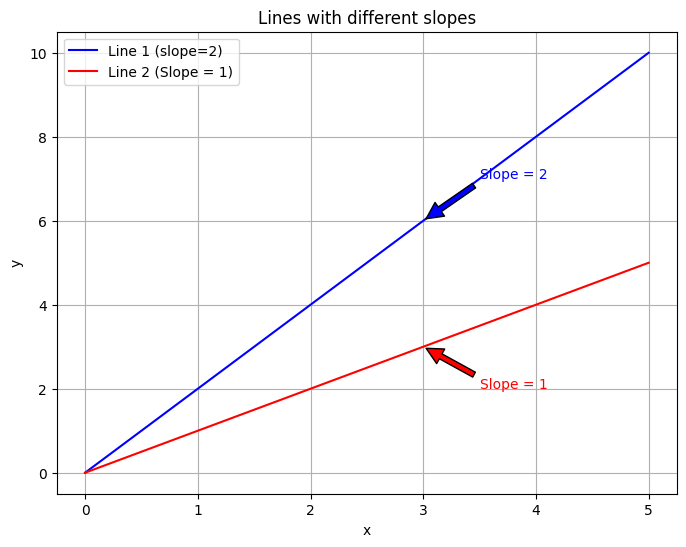

In [86]:
x_line1 = [0, 5]
y_line1 = [0, 10] #Slope 2
x_line2 = [0, 5]
y_line2 = [0, 5] #Slope = 1}

#Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x_line1, y_line1, label="Line 1 (slope=2)", color='blue')
plt.plot(x_line2, y_line2, label="Line 2 (Slope = 1)", color='red')

# Annotate the slopes
plt.annotate('Slope = 2', xy=(3, 6), xytext=(3.5, 7), arrowprops=dict(facecolor='blue', shrink=0.05), color="blue")
plt.annotate("Slope = 1", xy=(3, 3), xytext=(3.5, 2), arrowprops=dict(facecolor='red', shrink=0.05), color="red")


#Add label and legend
plt.title('Lines with different slopes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
total_cards = 52
aces = 4
prob_ace = aces/total_cards
print("Probability of drawing an Ace:", prob_ace)

Probability of drawing an Ace: 0.07692307692307693


In [88]:
prob_face = 3/52*4
print(prob_face)

0.23076923076923078


In [89]:
#dice problem
list_dice = my_np.array(my_np.random.randint(1, 7, 10))
print(list_dice)

[1 5 5 1 5 1 5 4 1 2]


In [90]:
#Affine Funcitons
def affine(x, a, b): #this is an example of a python funciton
    return x*a+b

print("Affine(2, 3, 4):", affine(2, 3, 4))

Affine(2, 3, 4): 10


In [91]:
affine(1, 2, 4)

6

In [92]:
#filtering
nums = [5, 3, 8, 1, 4, 9]
filtered = [n for n in nums if n>4]
print(filtered)

[5, 8, 9]


In [93]:
#sorted numbers
sorted_nums = sorted(nums)
print("Filtered (>4):", filtered)
print('sorted: ', sorted_nums)

Filtered (>4): [5, 8, 9]
sorted:  [1, 3, 4, 5, 8, 9]


In [94]:
sorted_des = sorted(nums, reverse=True)
print(sorted_des)

[9, 8, 5, 4, 3, 1]


In [95]:
dice_nums = my_np.random.randint(1, 7, 10)
print(dice_nums)

[1 4 6 3 2 1 5 3 3 4]


In [96]:
filtered_nums = [n for n in dice_nums if n<= 3 and n%2==0]
print(filtered_nums)

[np.int64(2)]


In [102]:
def func_dice_less3_even():
    dice_nums = my_np.random.randint(1, 7, 10)
    filtered_nums = [n for n in dice_nums if n<=3 and n%2 ==0]
    prob = len(filtered_nums)/len(dice_nums)
    return prob

print(func_dice_less3_even())
for i in range(15):
    print("Prob of dice is less than 3 and is even is: ", func_dice_less3_even())



0.3
Prob of dice is less than 3 and is even is:  0.1
Prob of dice is less than 3 and is even is:  0.2
Prob of dice is less than 3 and is even is:  0.0
Prob of dice is less than 3 and is even is:  0.4
Prob of dice is less than 3 and is even is:  0.0
Prob of dice is less than 3 and is even is:  0.2
Prob of dice is less than 3 and is even is:  0.1
Prob of dice is less than 3 and is even is:  0.1
Prob of dice is less than 3 and is even is:  0.2
Prob of dice is less than 3 and is even is:  0.1
Prob of dice is less than 3 and is even is:  0.0
Prob of dice is less than 3 and is even is:  0.1
Prob of dice is less than 3 and is even is:  0.2
Prob of dice is less than 3 and is even is:  0.2
Prob of dice is less than 3 and is even is:  0.1


In [104]:
#adding binomial distribution
from scipy.stats import binom
n, p, k = 10, 0.5, 3
probb = binom.pmf(k, n, p)

print(f'P({k} successes out of {n} trials):', probb)



P(3 successes out of 10 trials): 0.1171875


[0.00271996 0.02039966 0.0849986  0.21249649 0.31874474 0.26562062
 0.09486451]


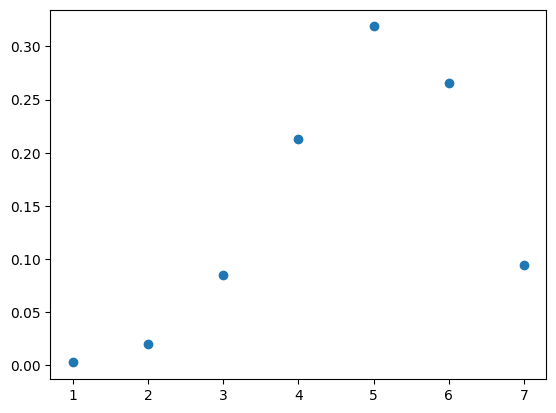

In [111]:
Porb= 5/7
n = 7
prob_list = []
for k in range(1, 8):
    prob_list.append(binom.pmf(k, n, Porb))

print(my_np.array(prob_list))

times = my_np.array([i for i in range(1, 8)])
plt.scatter(times, prob_list)
    

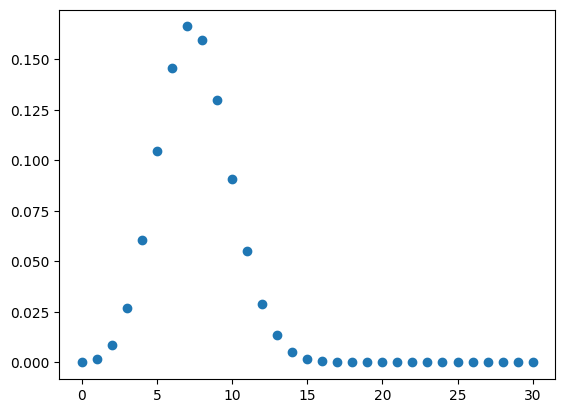

In [114]:
n = 30
p = 0.25
k = list(range(n+1))
plt.scatter(k, binom.pmf(k, n, p))

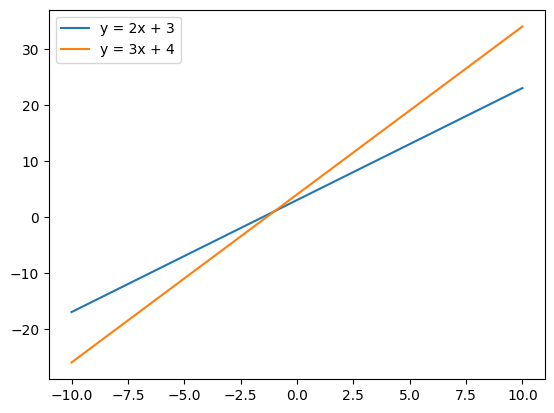

In [115]:
x = my_np.linspace(-10, 10, 400)
y1 = affine(x, 2, 3)
y2 = affine(x, 3, 4)
plt.plot(x, y1, label='y = 2x + 3')
plt.plot(x, y2, label='y = 3x + 4')
plt.legend()
plt.show()

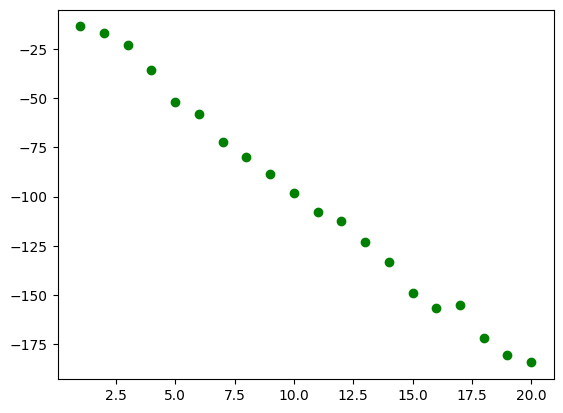

In [117]:
x = list(range(1, 21)) #Generate a longer list for x
negatively_correlated_y = [-9.5*xi + random.uniform(-7, 7) for xi in x]
plt.scatter(x, negatively_correlated_y, color='green')